In [3]:
# !pip install -r work/kaggle_comp/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 4.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.5 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 1.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 1.3 MB/s eta 0:00:00ta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=c5f7f61a4f7926dc9654caef38463a086e1dde4b66d5c2d7efc8f9f45c00630d
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle


In [7]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /home/jovyan


In [2]:
import sys
import os

# Set the correct module path relative to the current working directory
module_path = os.path.abspath(os.path.join("work", "data", "kaggle_datasets"))

# Ensure the path is in sys.path
if module_path not in sys.path:
    sys.path.insert(0, module_path)

print("Module Path:", module_path)


from kaggle_downloader import download_and_extract_competition


# Define competition parameters
challenge_name = "backpack_prediction"
competition_id = "playground-series-s5e2"
output_dir = os.path.join(module_path, challenge_name)

# Run the dataset download
download_and_extract_competition(competition_id, output_dir)


Module Path: /home/jovyan/work/data/kaggle_datasets
✅ Kaggle API authenticated successfully!
📥 Downloading competition 'playground-series-s5e2' dataset...
📂 Extracting files from /home/jovyan/work/data/kaggle_datasets/backpack_prediction/playground-series-s5e2.zip...
✅ Extraction complete.
🗑 Deleted zip file: /home/jovyan/work/data/kaggle_datasets/backpack_prediction/playground-series-s5e2.zip
🎉 Download and extraction process completed successfully!


 
# 1. SET UP SPARK SESSION AND LOAD DATA
 


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as sum_, skewness, kurtosis, avg, when
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, MinMaxScaler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.ml import Pipeline
import pyspark.sql.functions as F


: 

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GPU_Spark_App") \
    .config("spark.plugins", "com.nvidia.spark.SQLPlugin") \
    .config("spark.executor.resource.gpu.amount", "1") \
    .config("spark.task.resource.gpu.amount", "1") \
    .getOrCreate()

print("GPU Support Enabled: ", spark.conf.get("spark.rapids.sql.enabled"))


Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.lang.ClassNotFoundException: com.nvidia.spark.SQLPlugin
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:445)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:592)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:525)
	at java.base/java.lang.Class.forName0(Native Method)
	at java.base/java.lang.Class.forName(Class.java:467)
	at org.apache.spark.util.SparkClassUtils.classForName(SparkClassUtils.scala:41)
	at org.apache.spark.util.SparkClassUtils.classForName$(SparkClassUtils.scala:36)
	at org.apache.spark.util.Utils$.classForName(Utils.scala:94)
	at org.apache.spark.util.Utils$.$anonfun$loadExtensions$1(Utils.scala:2774)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:293)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:293)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:290)
	at scala.collection.AbstractTraversable.flatMap(Traversable.scala:108)
	at org.apache.spark.util.Utils$.loadExtensions(Utils.scala:2772)
	at org.apache.spark.internal.plugin.PluginContainer$.apply(PluginContainer.scala:207)
	at org.apache.spark.internal.plugin.PluginContainer$.apply(PluginContainer.scala:193)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:579)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:499)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:480)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [ ]:
train = spark.read.csv(f"{module_path}/backpack_prediction/train.csv", header=True, inferSchema=True) 
train.show(5)


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
train.printSchema()


root
 |-- id: integer (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Material: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Compartments: double (nullable = true)
 |-- Laptop Compartment: string (nullable = true)
 |-- Waterproof: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Weight Capacity (kg): double (nullable = true)
 |-- Price: double (nullable = true)



 
# 2. DATA QUALITY CHECK: MISSING VALUES
 


In [ ]:
train.describe().show()


+-------+-----------------+------------+---------+------+------------------+------------------+----------+--------+------+--------------------+-----------------+
|summary|               id|       Brand| Material|  Size|      Compartments|Laptop Compartment|Waterproof|   Style| Color|Weight Capacity (kg)|            Price|
+-------+-----------------+------------+---------+------+------------------+------------------+----------+--------+------+--------------------+-----------------+
|  count|           300000|      290295|   291653|293405|            300000|            292556|    292950|  292030|290050|              299862|           300000|
|   mean|         149999.5|        NULL|     NULL|  NULL|           5.44359|              NULL|      NULL|    NULL|  NULL|  18.029993961322948|81.41110683033345|
| stddev|86602.68471589088|        NULL|     NULL|  NULL|2.8907656022213044|              NULL|      NULL|    NULL|  NULL|   6.966914127262582|39.03934037712683|
|    min|                0| 

## Checking for Missing Values to Ensure Data Completeness

Before moving on, a data scientist must check for missing data. Missing values can lead to inaccurate models if not handled properly. Here, we count the number of nulls in each column. For example, if the "Brand" column has fewer records than the total row count, it might indicate missing data. This step is vital for deciding whether to impute missing values, drop them, or treat them as a separate category.

Business stakeholders want assurance that the data is complete and reliable. Any significant gap here may affect customer insights or market analysis.


In [ ]:
missing_counts = train.select([ sum_(col(c).isNull().cast("int")).alias(c) for c in train.columns])
missing_counts.show()


+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
| id|Brand|Material|Size|Compartments|Laptop Compartment|Waterproof|Style|Color|Weight Capacity (kg)|Price|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
|  0| 9705|    8347|6595|           0|              7444|      7050| 7970| 9950|                 138|    0|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+




# 3. UNIVARIATE ANALYSIS: DESCRIPTIVE STATISTICS, SKEWNESS, AND KURTOSIS



## Identify numerical columns. We look for columns with types 'int', 'double', or 'float'.



In [ ]:
num_columns = [ field.name for field in train.schema.fields if field.dataType.simpleString() in ["int", "double", "float"]]
print("Number of numeric columns: ", num_columns )


Number of numeric columns:  ['id', 'Compartments', 'Weight Capacity (kg)', 'Price']


## Compute skewness and kurtosis for each numerical column.


In [10]:
train.describe(num_columns).show()


NameError: name 'train' is not defined

In [11]:
for column_name in num_columns:
    print(F" Statistics for column: {column_name}")
 
    stats_df = train.select(
        skewness((column_name)).alias("skewness"),
        kurtosis((column_name)).alias("kurtosis")
    )
    stats_df.show()


NameError: name 'num_columns' is not defined

## Explanation:

Univariate analysis helps us understand the distribution of each variable individually. Descriptive statistics, obtained using the `describe()` method, provide a quick summary including count, mean, standard deviation, minimum, and maximum values. This serves as our initial checkpoint to verify the ranges and consistency of the data.

Skewness measures the asymmetry of the data distribution. A value close to 0 indicates symmetry. Positive skewness suggests a long tail on the right (indicating a few very high values), while negative skewness indicates a long tail on the left.

Kurtosis provides information about the heaviness of the tails in the data distribution. Higher kurtosis indicates heavy tails (more outliers), whereas lower kurtosis suggests lighter tails.

Data scientists use these values to determine if data transformation (such as a logarithmic transformation) is necessary. Business teams find this information valuable for identifying anomalies that might affect revenue forecasts or customer segmentation.

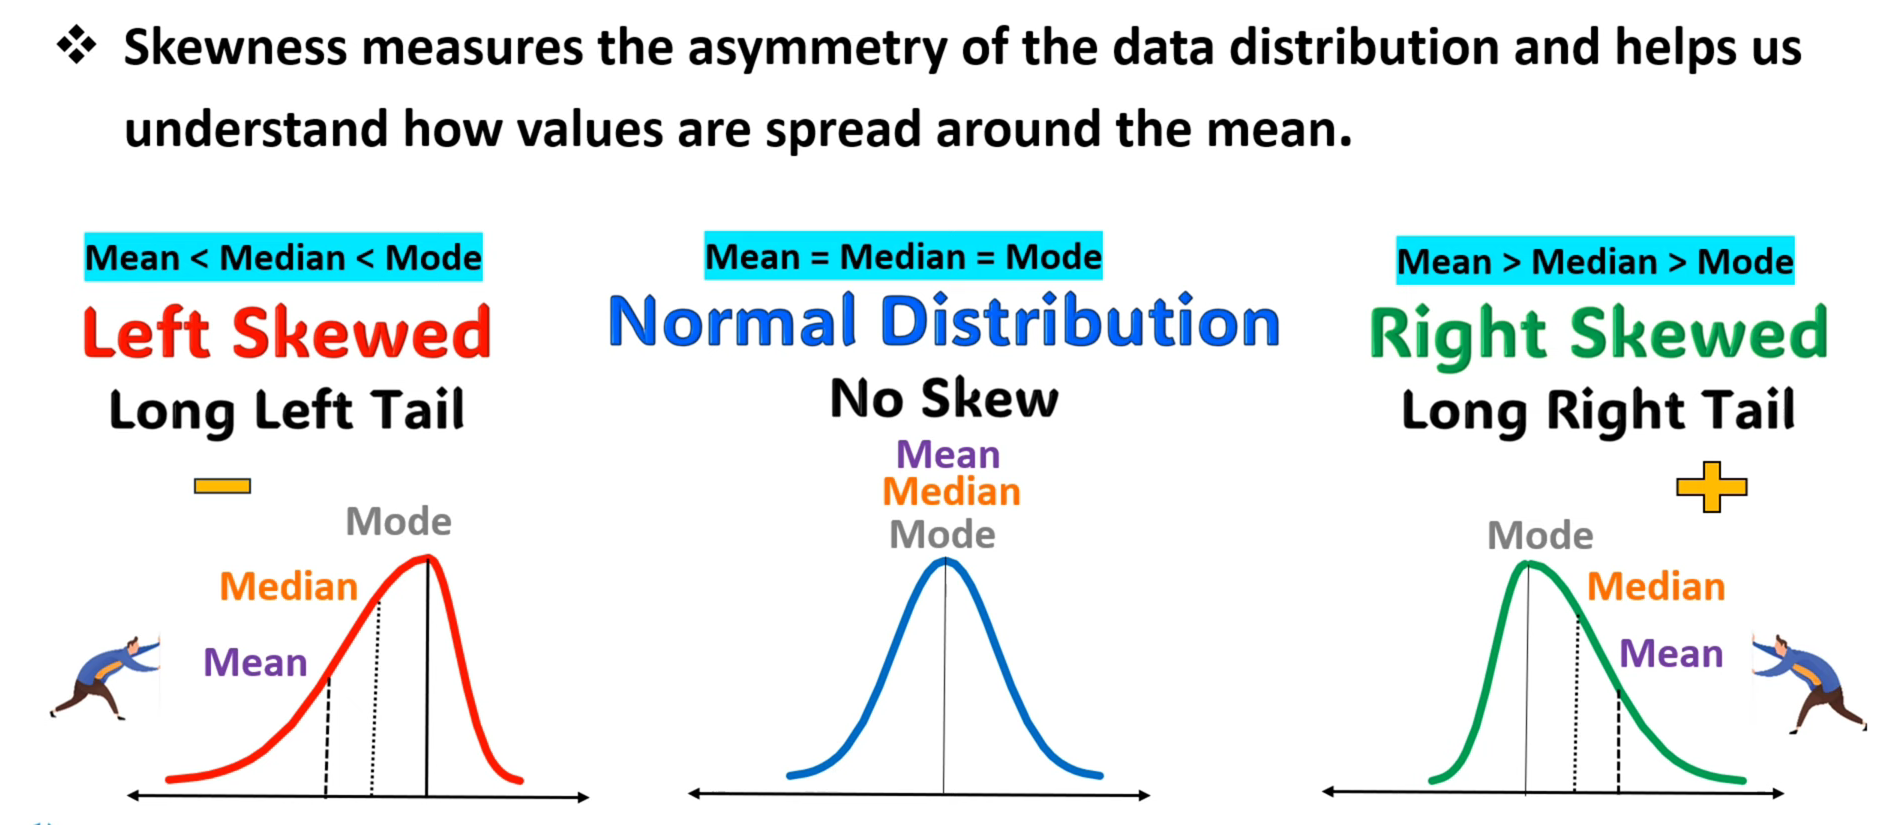
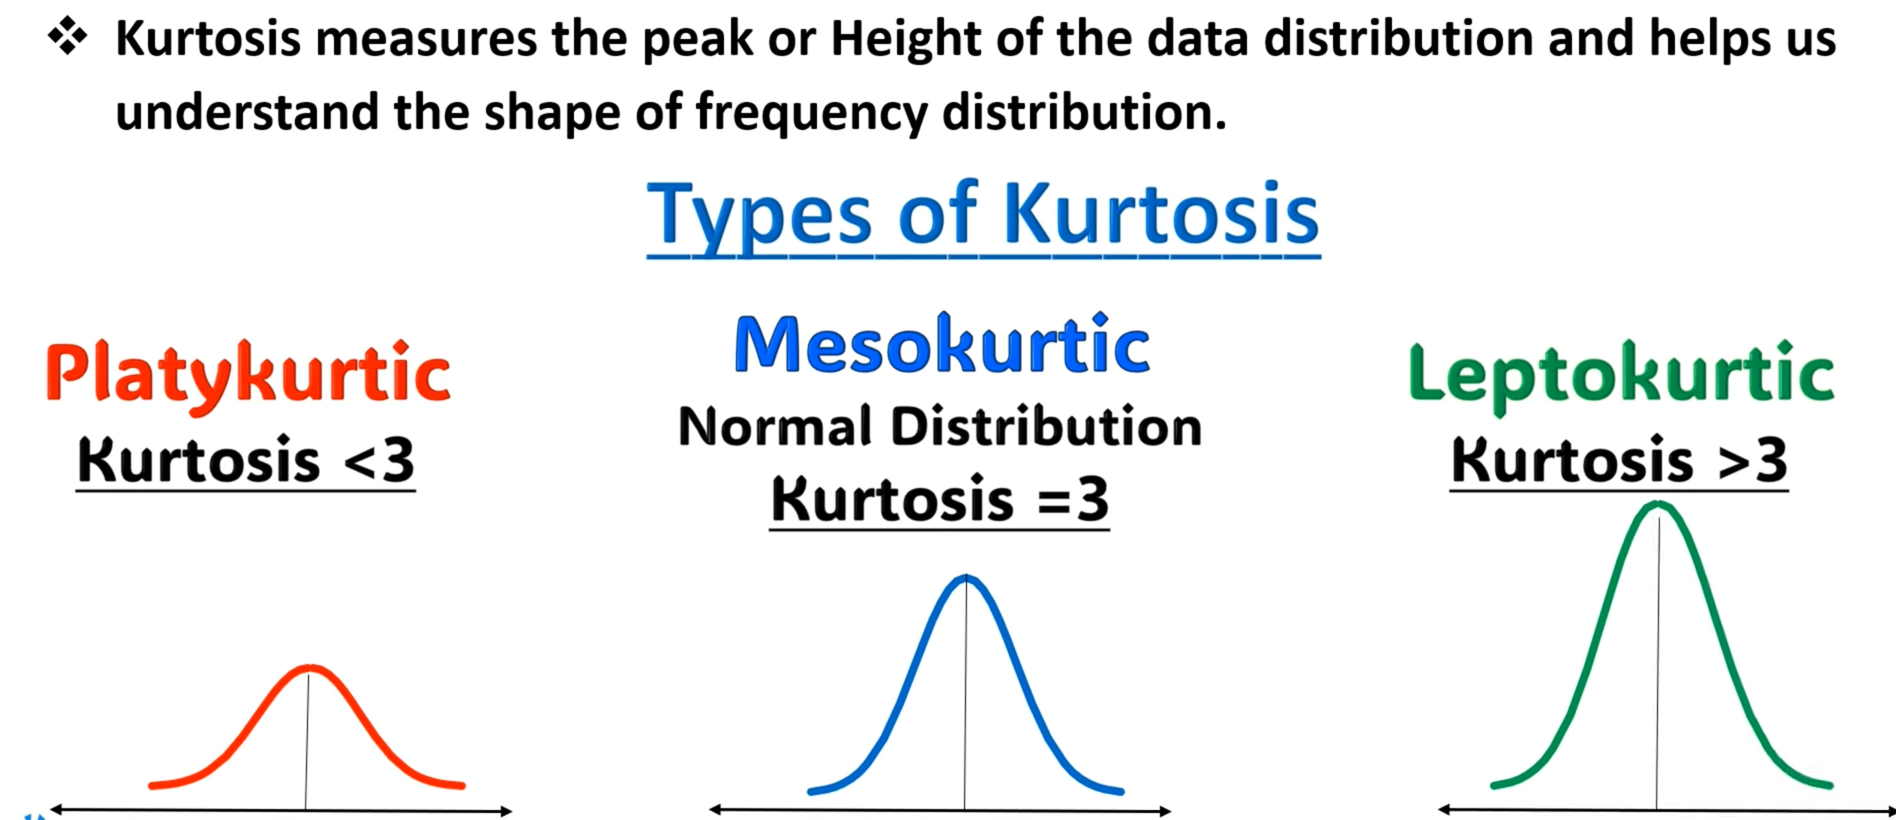
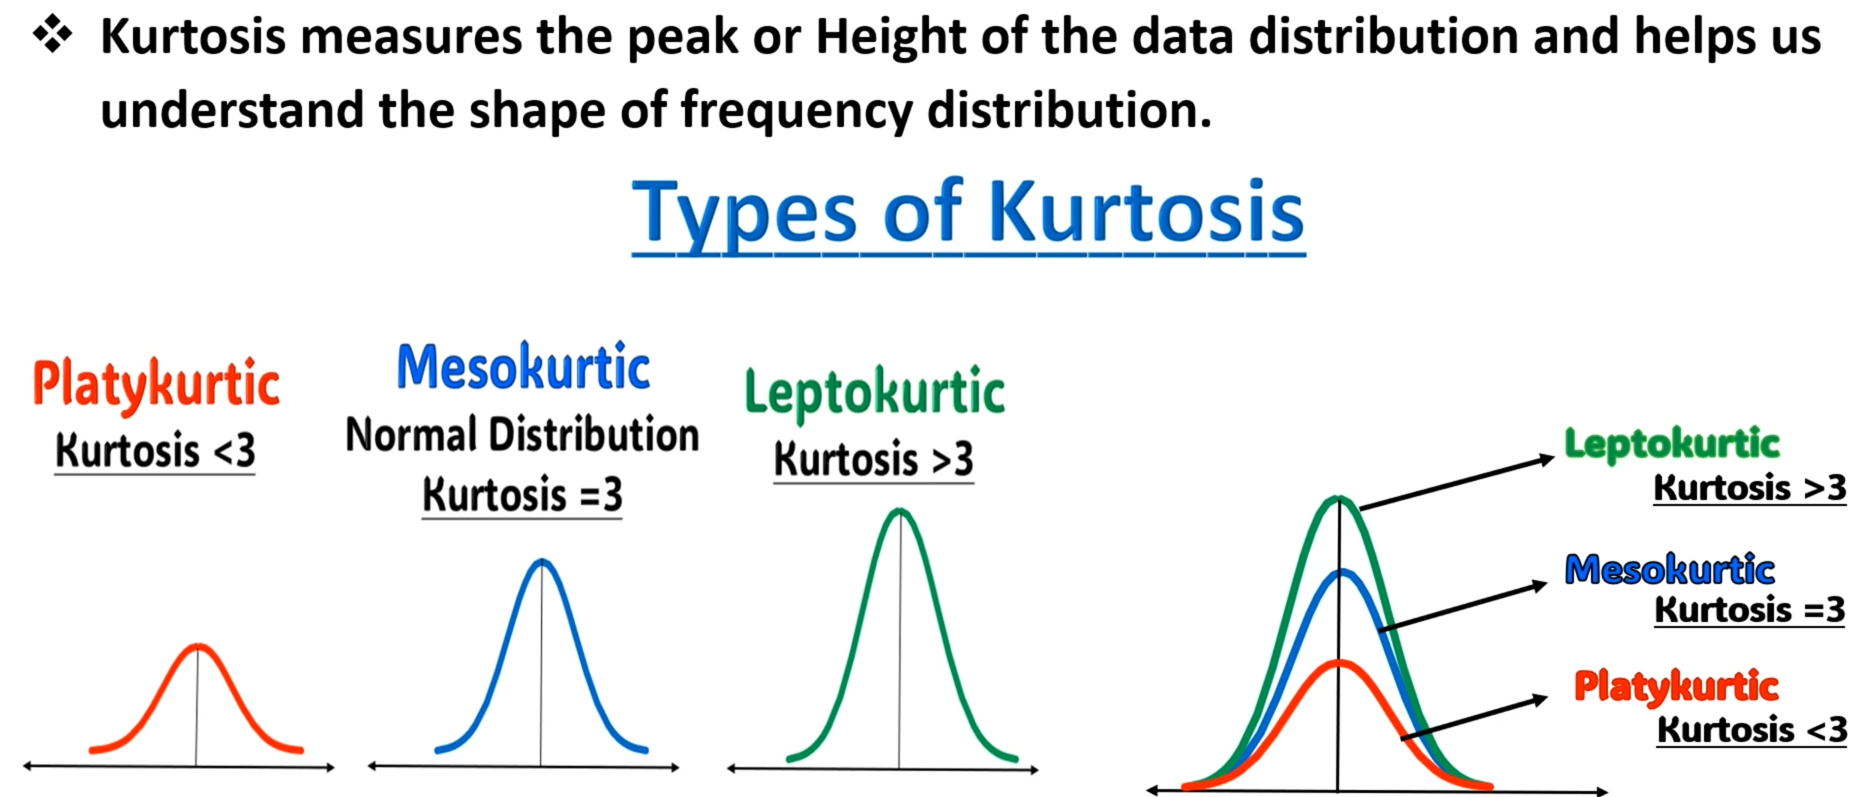
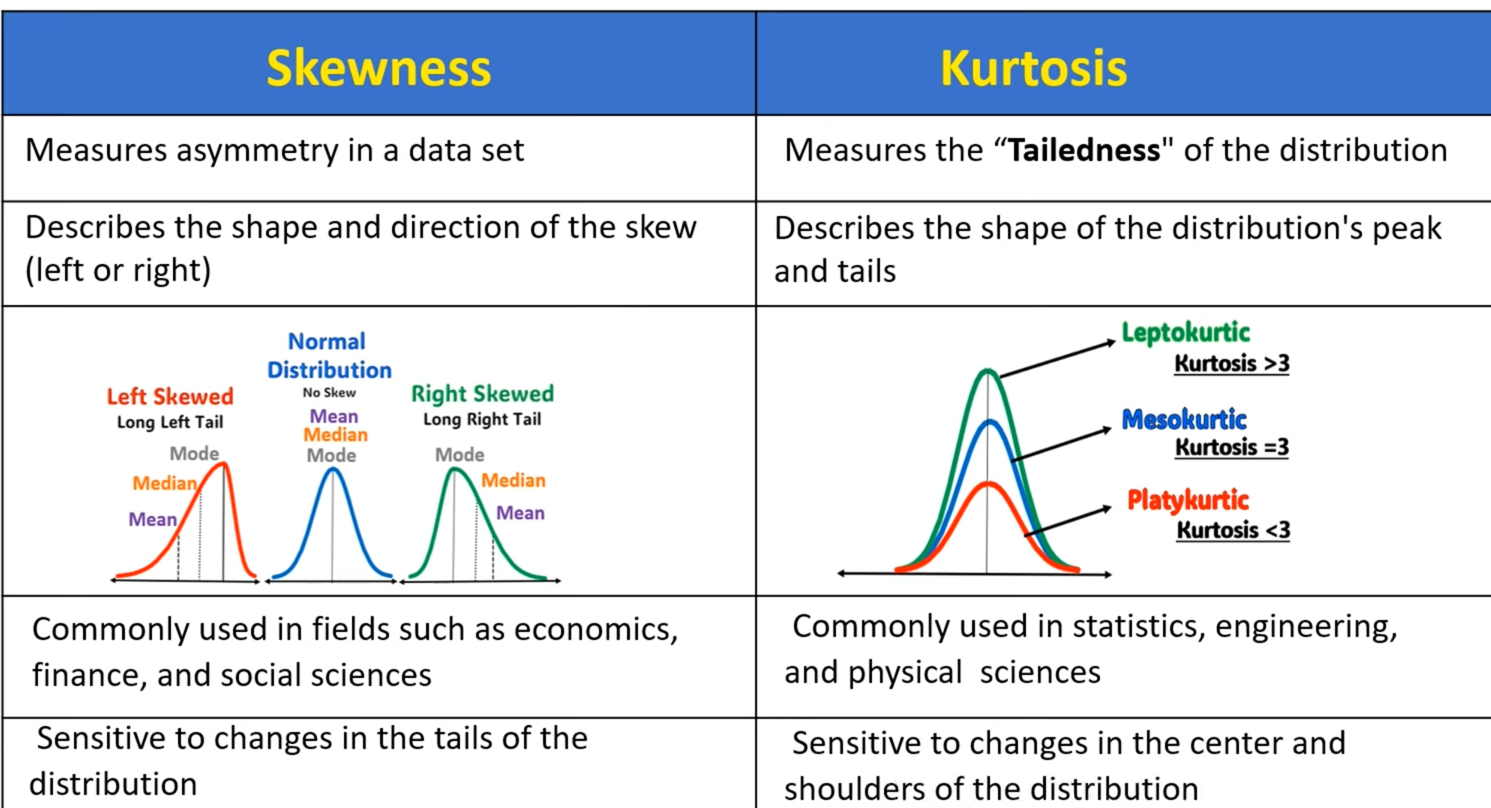

# 4. UNIVARIATE ANALYSIS OF CATEGORICAL FEATURES


In [103]:
categorical_columns_name = [field.name for field in train.schema.fields if field.dataType.simpleString() == "string" ]
print("Categorical columns: ", categorical_columns_name)


Categorical columns:  ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [104]:
# For each categorical column, display the top 5 frequency counts.
for column_name in categorical_columns_name:
    print(F"Top 5 frequency counts for column: {column_name}")
    train.groupBy(column_name).count().orderBy("count", ascending=False).show(5)


Top 5 frequency counts for column: Brand
+------------+-----+
|       Brand|count|
+------------+-----+
|      Adidas|60077|
|Under Armour|59992|
|        Nike|57336|
|        Puma|56814|
|    Jansport|56076|
+------------+-----+
only showing top 5 rows

Top 5 frequency counts for column: Material
+---------+-----+
| Material|count|
+---------+-----+
|Polyester|79630|
|  Leather|73416|
|    Nylon|70603|
|   Canvas|68004|
|     NULL| 8347|
+---------+-----+

Top 5 frequency counts for column: Size
+------+------+
|  Size| count|
+------+------+
|Medium|101906|
| Large| 98643|
| Small| 92856|
|  NULL|  6595|
+------+------+

Top 5 frequency counts for column: Laptop Compartment
+------------------+------+
|Laptop Compartment| count|
+------------------+------+
|               Yes|148342|
|                No|144214|
|              NULL|  7444|
+------------------+------+

Top 5 frequency counts for column: Waterproof
+----------+------+
|Waterproof| count|
+----------+------+
|       Yes|


## Explanation:
 Categorical variables (like Brand, Material, Size, etc.) require different handling.
 Instead of means, we look at frequency counts to understand which categories are most common.
 
 - **For the Data Scientist:**  
   This information helps in identifying class imbalances or rare categories that might need 
   special handling (e.g., one-hot encoding, grouping).
 
 - **For Business Teams:**  
   They gain insights into the distribution of brands, styles, and materials. For instance, knowing 
   that "Adidas" is dominant in the Brand column may influence marketing strategies.
 

# 5. BIVARIATE ANALYSIS: SCATTER PLOT 


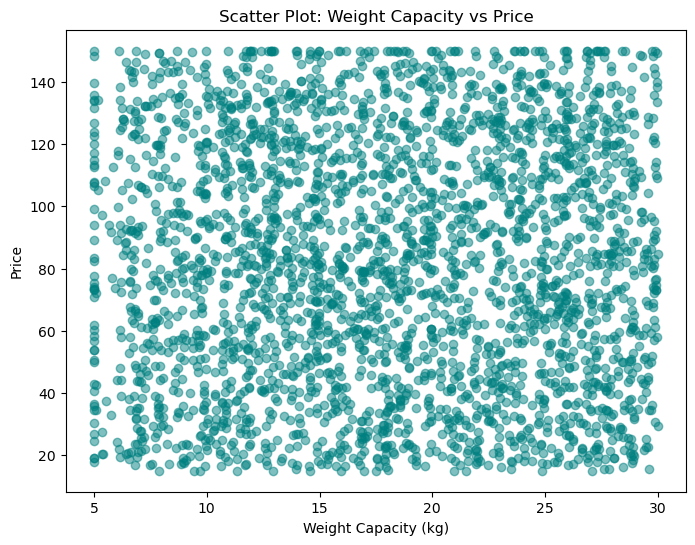

In [160]:
# For bivariate analysis, let's look at the relationship between two numerical variables.
# Example: How does "Weight Capacity (kg)" relate to "Price"?
# Sampling the data (1% of the dataset) for quicker plotting.
sampled_data = train.sample(False, 0.01).toPandas()



plt.figure(figsize=(8, 6))
plt.scatter(sampled_data["Weight Capacity (kg)"], sampled_data["Price"], alpha=0.5, color="teal")
plt.title("Scatter Plot: Weight Capacity vs Price")
plt.xlabel("Weight Capacity (kg)")
plt.ylabel("Price")
plt.show()



## Explanation:
 Bivariate analysis explores the relationship between two variables.

 - **Data Scientist's Perspective:**  
   Scatter plots are used to detect trends (linear, non-linear) and potential correlations between features.
   If a strong relationship is detected, that variable might be a key predictor.

 - **Team's Perspective:**  
   Business teams look at these relationships to validate assumptions, for example, whether backpacks 
   with higher weight capacity are indeed priced higher—a factor that could inform pricing strategies.

# 6. MULTIVARIATE ANALYSIS: CORRELATION MATRIX & HEATMAP



In [144]:
assembler = VectorAssembler(inputCols=num_columns, outputCol="features", handleInvalid="skip")
train_vector = assembler.transform(train.select(num_columns))


In [145]:
print(train_vector.schema["features"].dataType)


VectorUDT()


In [146]:
correlation_matrix = Correlation.corr(train_vector, "features").head()[0].toArray()
print(correlation_matrix)


[[ 1.00000000e+00  9.12671838e-04 -1.01511978e-03  2.05753568e-03]
 [ 9.12671838e-04  1.00000000e+00  2.54208554e-03 -3.82024388e-04]
 [-1.01511978e-03  2.54208554e-03  1.00000000e+00  1.80181951e-02]
 [ 2.05753568e-03 -3.82024388e-04  1.80181951e-02  1.00000000e+00]]


In [147]:
corr_pd = pd.DataFrame(correlation_matrix, columns=num_columns, index=num_columns)
print("Correlation Matrix")
print(corr_pd) 


Correlation Matrix
                            id  Compartments  Weight Capacity (kg)     Price
id                    1.000000      0.000913             -0.001015  0.002058
Compartments          0.000913      1.000000              0.002542 -0.000382
Weight Capacity (kg) -0.001015      0.002542              1.000000  0.018018
Price                 0.002058     -0.000382              0.018018  1.000000


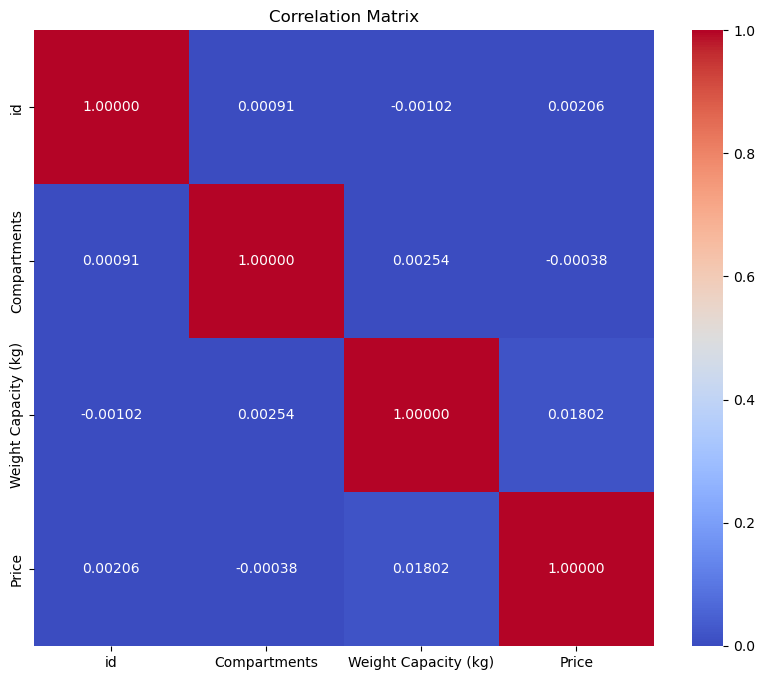

In [150]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pd, annot=True, cmap="coolwarm", fmt=".5f")
plt.title("Correlation Matrix")
plt.show()


 
## Explanation:
 Multivariate analysis helps us understand how multiple features interact.

 - **For the Data Scientist:**  
   A correlation matrix identifies if any features are strongly correlated. Highly correlated 
   features might be redundant, and this informs feature selection and dimensionality reduction.

 - **For the Team:**  
   Understanding correlations can confirm or challenge business hypotheses. For example, a strong 
   correlation between Price and Weight Capacity could be a critical insight for marketing or product strategy.
 ----

# 7. OUTLIER DETECTION: USING THE IQR METHOD FOR 'Price'


In [156]:
sampled_data = train.sample(False, 0.01).toPandas()
price_series = sampled_data["Price"].dropna()
Q1 = price_series.quantile(0.25)
Q3 = price_series.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)


IQR:  67.11279


In [159]:
weight_series = sampled_data["Weight Capacity (kg)"].dropna()
Q1 = weight_series.quantile(0.25)
Q3 = weight_series.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)


IQR:  11.781044729362845


## Explanation:
 Outliers can heavily influence models, so it’s critical to detect them early.

 - **For the Data Scientist:**  
   Outlier detection (here using the IQR method) helps decide whether to transform, cap, or remove these data points.

 - **For the Business Team:**  
   They need to know if extreme values (e.g., an unusually expensive backpack) are genuine or errors,
   as these might influence revenue forecasts or customer segmentation.
 -----------------------------------------------------------------------------


In [162]:
train.columns


['id',
 'Brand',
 'Material',
 'Size',
 'Compartments',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color',
 'Weight Capacity (kg)',
 'Price']

# Data Preprocessing & Feature Engineering


In [172]:
# count nulls in each  column 
missing_counts = train.select([ sum_(col(c).isNull().cast("int")).alias(c) for c in train.columns])
missing_counts.show()


+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
| id|Brand|Material|Size|Compartments|Laptop Compartment|Waterproof|Style|Color|Weight Capacity (kg)|Price|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
|  0| 9705|    8347|6595|           0|              7444|      7050| 7970| 9950|                 138|    0|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+



##  MISSING VALUE IMPUTATION


In [168]:
train.count()


300000

In [199]:
# drop na from the brand columns
df_imputed = train.dropna()
df_imputed.count()


246686

In [200]:
# count nulls in each  column 
missing_counts = df_imputed.select([ sum_(col(c).isNull().cast("int")).alias(c) for c in df_imputed.columns])
missing_counts.show()


+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
| id|Brand|Material|Size|Compartments|Laptop Compartment|Waterproof|Style|Color|Weight Capacity (kg)|Price|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+
|  0|    0|       0|   0|           0|                 0|         0|    0|    0|                   0|    0|
+---+-----+--------+----+------------+------------------+----------+-----+-----+--------------------+-----+




## Explanation:
 Data scientists need to handle missing data to avoid errors in modeling.
 - For categorical variables, missing values are often replaced with a placeholder like "Unknown".
 - For numerical variables, imputing with the mean (or median) preserves the overall distribution.
 Business teams appreciate that missing data is addressed so that insights aren’t biased.


# ENCODING CATEGORICAL DATA


In [212]:

# We first use StringIndexer to convert categorical strings into numerical indices.
# Then, OneHotEncoder can be applied to create binary indicator columns if needed.

indexers = [StringIndexer(inputCol=col, outputCol=col+"_Index", handleInvalid="keep") for col in categorical_columns_name]



In [213]:
encoder = OneHotEncoder(inputCols=[c + "_Index" for c in categorical_columns_name],
                        outputCols=[c + "_OHE" for c in categorical_columns_name],
                        handleInvalid="keep")



## Explanation:
 Models generally require numerical input. StringIndexer maps categorical values to numeric indices.
 OneHotEncoder further transforms these indices into a binary vector to avoid implying ordinal relationships.
 Data scientists perform these steps to ensure the models interpret categorical features correctly.
 Business teams benefit because the encoded features capture category information without misleading assumptions.



# FEATURE SCALING: STANDARDIZATION AND NORMALIZATION


In [214]:
# Assemble numerical columns into a single vector
assembler = VectorAssembler(inputCols=num_columns, outputCol="features", handleInvalid="skip")
# Standard scaler to standardize the features (mean = 0, std = 1)
scaler_std = StandardScaler(inputCol="features", outputCol="features_std", withStd=True, withMean=True)
# MinMax scaler to scale the features between 0 and 1
scaler_minmax = MinMaxScaler(inputCol="features", outputCol="features_minmax")



# Explanation:
 Scaling features is essential so that they contribute equally to the model.
 - StandardScaler removes mean and scales to unit variance.
 - MinMaxScaler normalizes features to a specific range.
 This process avoids issues where features with large scales dominate the model.
 Data scientists appreciate standardized inputs, while business teams know that this step
 improves model fairness and interpretability.

# FEATURE CONSTRUCTION & OUTLIER HANDLING


In [203]:
# create a new feature "Price per Compartment"
# handle division by zero if Compartment is zero
df_imputed = df_imputed.withColumn("Price_per_Compartment", when(col("Compartments") > 0,  col("Price") / col("Compartments")).otherwise(col("Price")))


In [204]:
df_imputed = df_imputed.withColumn("Price_capped", when(col("Price") > 150, F.lit(150)).otherwise(col("Price")))


# Explanation:
 Feature construction creates new variables that might capture hidden relationships.
 "Price per Compartment" can reveal the cost efficiency of a backpack.
 Outlier handling (here, capping Price) reduces the influence of extreme values.
 Data scientists use such engineered features to boost model performance.
 Business teams find these features useful for deeper insights, like understanding value per feature.


# BUILD A PIPELINE TO CHAIN TRANSFORMATIONS TOGETHER

In [216]:
# combine all stages into one pipeline
# - index Categarical features, encode them
# - assemble numerical features and scale them

stages = indexers + [encoder, assembler, scaler_std, scaler_minmax]
pipeline = Pipeline(stages=stages)


In [217]:
# Fit the pipeline and transform the data
model = pipeline.fit(df_imputed)
df_transformed = model.transform(df_imputed)


# Explanation:
 Using a Pipeline makes the transformations reproducible and simplifies the workflow.
 It allows the data scientist to apply all preprocessing steps in one go.
 Teams appreciate this approach because it standardizes the data preparation process.

#  INSPECT THE TRANSFORMED DATA


In [223]:
selected_cols = ["id", "Price", "Price_Capped", "Compartments", "Price_per_Compartment"] + \
                [c + "_OHE" for c in categorical_columns_name] + ["features_std", "features_minmax"]
df_transformed.select(selected_cols).show(5, truncate=False)


+---+---------+------------+------------+---------------------+-------------+-------------+-------------+----------------------+--------------+-------------+-------------+----------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|id |Price    |Price_Capped|Compartments|Price_per_Compartment|Brand_OHE    |Material_OHE |Size_OHE     |Laptop Compartment_OHE|Waterproof_OHE|Style_OHE    |Color_OHE    |features_std                                                                      |features_minmax                                                                  |
+---+---------+------------+------------+---------------------+-------------+-------------+-------------+----------------------+--------------+-------------+-------------+----------------------------------------------------------------------------------+------------------------------------------------------------------------

In [ ]:
spark.stop()
